In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
import scikit_posthocs as sp

plt.style.use("bmh")

In [9]:
his = pd.read_csv("../data/processed/temporal/historical.csv")
ssp119 = pd.read_csv("../data/processed/temporal/ssp119.csv")
ssp126 = pd.read_csv("../data/processed/temporal/ssp126.csv")
ssp245 = pd.read_csv("../data/processed/temporal/ssp245.csv")
ssp370 = pd.read_csv("../data/processed/temporal/ssp370.csv")
ssp585 = pd.read_csv("../data/processed/temporal/ssp585.csv")

In [8]:
# Extracting pH_med column for analysis
datasets = {
    'Historical': his['pH_med'],
    'SSP119': ssp119['pH_med'],
    'SSP126': ssp126['pH_med'],
    'SSP245': ssp245['pH_med'],
    'SSP370': ssp370['pH_med'],
    'SSP585': ssp585['pH_med']
}

# Perform skewness, kurtosis, Shapiro-Wilk test for normality, and ADF test for stationarity
for name, data in datasets.items():
    print(f"\nResults for {name}:")
    
    # Skewness and Kurtosis
    skew = stats.skew(data.dropna())  # dropna to handle missing values
    kurt = stats.kurtosis(data.dropna(), fisher=False)  # not adjusted by -3
    
    # Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p = stats.shapiro(data.dropna())
    
    # ADF test for stationarity
    adf_stat, adf_p, usedlag, nobs, critical_values, icbest = adfuller(data.dropna())
    
    print(f"  Skewness: {skew:.3f}")
    print(f"  Kurtosis: {kurt:.3f}")
    print(f"  Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")
    if shapiro_p > 0.05:
        print("  The distribution appears to be normal.")
    else:
        print("  The distribution does not appear to be normal.")
    
    print(f"  ADF Test: Statistic={adf_stat:.3f}, p-value={adf_p:.3f}, Critical Values={critical_values}")
    if adf_p < 0.05:
        print("  The time series is stationary.")
    else:
        print("  The time series is not stationary.")



Results for Historical:
  Skewness: -0.944
  Kurtosis: 3.156
  Shapiro-Wilk Test: Statistic=0.917, p-value=0.114
  The distribution appears to be normal.
  ADF Test: Statistic=1.496, p-value=0.998, Critical Values={'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
  The time series is not stationary.

Results for SSP119:
  Skewness: 0.275
  Kurtosis: 1.588
  Shapiro-Wilk Test: Statistic=0.906, p-value=0.290
  The distribution appears to be normal.
  ADF Test: Statistic=-3.236, p-value=0.018, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
  The time series is stationary.

Results for SSP126:
  Skewness: 1.184
  Kurtosis: 3.296
  Shapiro-Wilk Test: Statistic=0.846, p-value=0.067
  The distribution appears to be normal.
  ADF Test: Statistic=-2.247, p-value=0.190, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
  The time series is not stationary.

Results for SSP245:
  Skewness: 0.443
  Kur

Kruskal-Wallis test statistic: 46.842, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.
Dunn's test p-values (Bonferroni adjusted):
            Historical  SSP 1-1.9  SSP 1-2.6  SSP 2-4.5  SSP 3-7.0  SSP 5-8.5
Historical       1.000      0.237      0.005      0.000       0.00      0.000
SSP 1-1.9        0.237      1.000      1.000      0.961       0.27      0.163
SSP 1-2.6        0.005      1.000      1.000      1.000       1.00      1.000
SSP 2-4.5        0.000      0.961      1.000      1.000       1.00      1.000
SSP 3-7.0        0.000      0.270      1.000      1.000       1.00      1.000
SSP 5-8.5        0.000      0.163      1.000      1.000       1.00      1.000
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.


/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

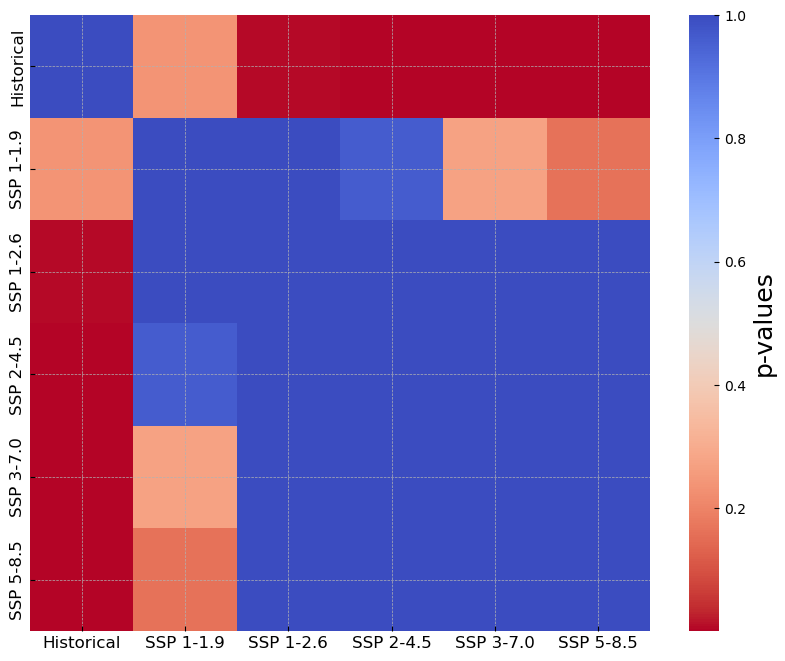

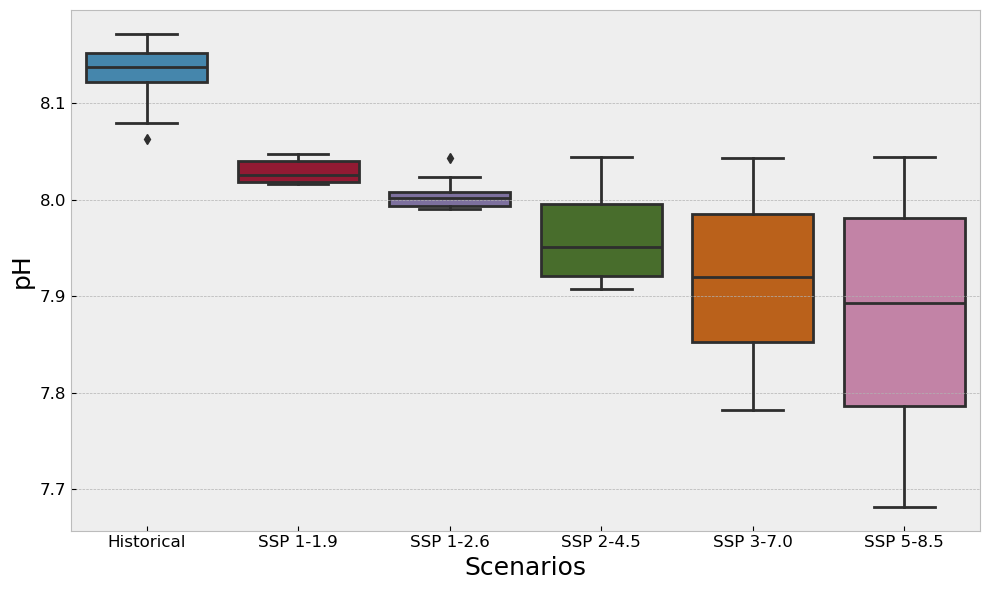

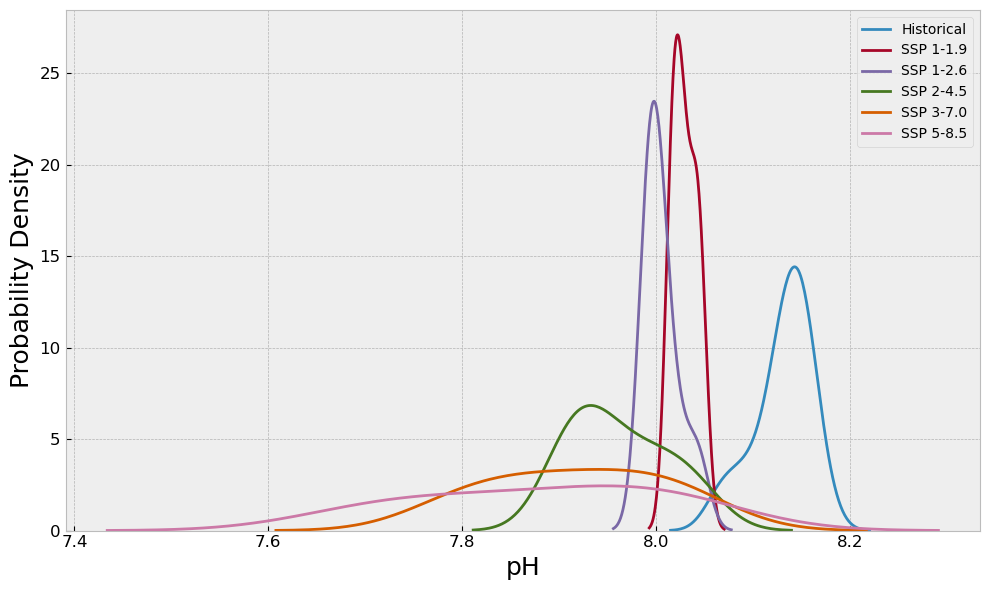

In [10]:
# Define the significance level
alpha = 0.05

# Generate dummy data with different sample sizes for the control group
data1 = ssp119['pH_med']
data2 = ssp126['pH_med']
data3 = ssp245['pH_med']
data4 = ssp370['pH_med']
data5 = ssp585['pH_med']
control = his['pH_med']


# Array of all groups for easy access
all_data = [control, data1, data2, data3, data4, data5]
labels = ['Historical', 'SSP 1-1.9', 'SSP 1-2.6', 'SSP 2-4.5', 'SSP 3-7.0', 'SSP 5-8.5']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df = pd.DataFrame({'Value': data_stacked, 'Group': groups})

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median pH.")

# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
    # Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')
    
    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")
    
    # Visualize Dunn's test results using a heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(dunn_pvalues, cmap='coolwarm_r', fmt=".3f", 
                     xticklabels=labels, yticklabels=labels)
    colorbar = ax.collections[0].colorbar
    colorbar.set_label('p-values', fontsize=18)
    plt.xticks(fontsize=12)  # Increased font size for x-axis labels
    plt.yticks(fontsize=12)  # Increased font size for y-axis labels
    plt.savefig('../figs/fig3d.png', dpi=450)  # Save the heatmap to a file
    
# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Scenarios', fontsize=18)
plt.ylabel('pH', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig3b.png', dpi=450)  # Save the boxplot to a file

# Create and save a Density Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(all_data):
    sns.kdeplot(group, label=labels[i])
plt.legend()
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('pH', fontsize=18)
plt.ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig3c.png', dpi=450)  # Save the density plot to a file

In [11]:
# Extracting argonite_med column for analysis
datasets = {
    'Historical': his['aragonite_med'],
    'SSP119': ssp119['aragonite_med'],
    'SSP126': ssp126['aragonite_med'],
    'SSP245': ssp245['aragonite_med'],
    'SSP370': ssp370['aragonite_med'],
    'SSP585': ssp585['aragonite_med']
}

# Perform skewness, kurtosis, Shapiro-Wilk test for normality, and ADF test for stationarity
for name, data in datasets.items():
    print(f"\nResults for {name}:")
    
    # Skewness and Kurtosis
    skew = stats.skew(data.dropna())  # dropna to handle missing values
    kurt = stats.kurtosis(data.dropna(), fisher=False)  # not adjusted by -3
    
    # Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p = stats.shapiro(data.dropna())
    
    # ADF test for stationarity
    adf_stat, adf_p, usedlag, nobs, critical_values, icbest = adfuller(data.dropna())
    
    print(f"  Skewness: {skew:.3f}")
    print(f"  Kurtosis: {kurt:.3f}")
    print(f"  Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")
    if shapiro_p > 0.05:
        print("  The distribution appears to be normal.")
    else:
        print("  The distribution does not appear to be normal.")
    
    print(f"  ADF Test: Statistic={adf_stat:.3f}, p-value={adf_p:.3f}, Critical Values={critical_values}")
    if adf_p < 0.05:
        print("  The time series is stationary.")
    else:
        print("  The time series is not stationary.")


Results for Historical:
  Skewness: -0.789
  Kurtosis: 2.871
  Shapiro-Wilk Test: Statistic=0.934, p-value=0.228
  The distribution appears to be normal.
  ADF Test: Statistic=7.165, p-value=1.000, Critical Values={'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
  The time series is not stationary.

Results for SSP119:
  Skewness: 0.309
  Kurtosis: 1.609
  Shapiro-Wilk Test: Statistic=0.905, p-value=0.283
  The distribution appears to be normal.
  ADF Test: Statistic=-0.928, p-value=0.779, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
  The time series is not stationary.

Results for SSP126:
  Skewness: 1.082
  Kurtosis: 3.096
  Shapiro-Wilk Test: Statistic=0.864, p-value=0.107
  The distribution appears to be normal.
  ADF Test: Statistic=-2.899, p-value=0.045, Critical Values={'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}
  The time series is stationary.

Results for SSP245:
  Skewness: 0.494
  Ku

Kruskal-Wallis test statistic: 48.133, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.
Dunn's test p-values (Bonferroni adjusted):
            Historical  SSP 1-1.9  SSP 1-2.6  SSP 2-4.5  SSP 3-7.0  SSP 5-8.5
Historical       1.000      0.367      0.004      0.000      0.000      0.000
SSP 1-1.9        0.367      1.000      1.000      0.694      0.152      0.092
SSP 1-2.6        0.004      1.000      1.000      1.000      1.000      1.000
SSP 2-4.5        0.000      0.694      1.000      1.000      1.000      1.000
SSP 3-7.0        0.000      0.152      1.000      1.000      1.000      1.000
SSP 5-8.5        0.000      0.092      1.000      1.000      1.000      1.000
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.


/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

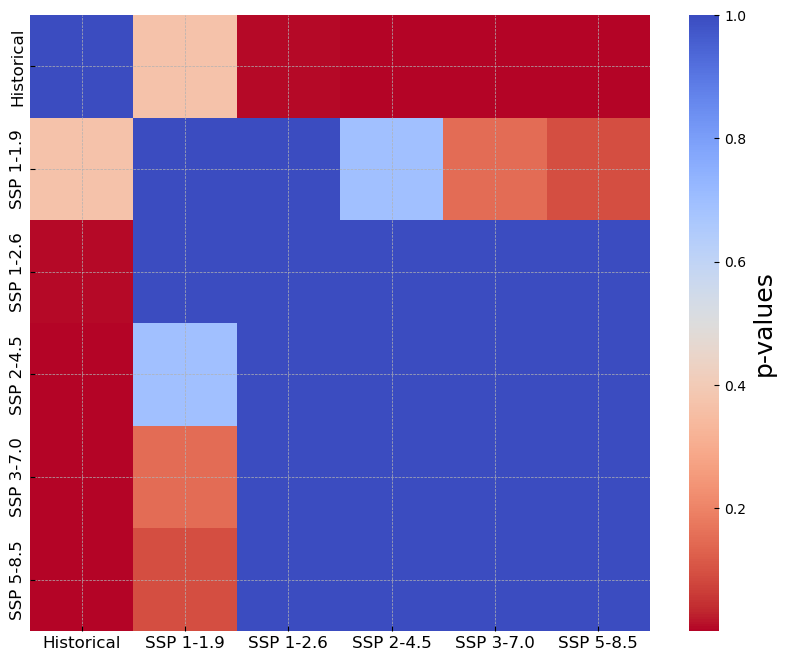

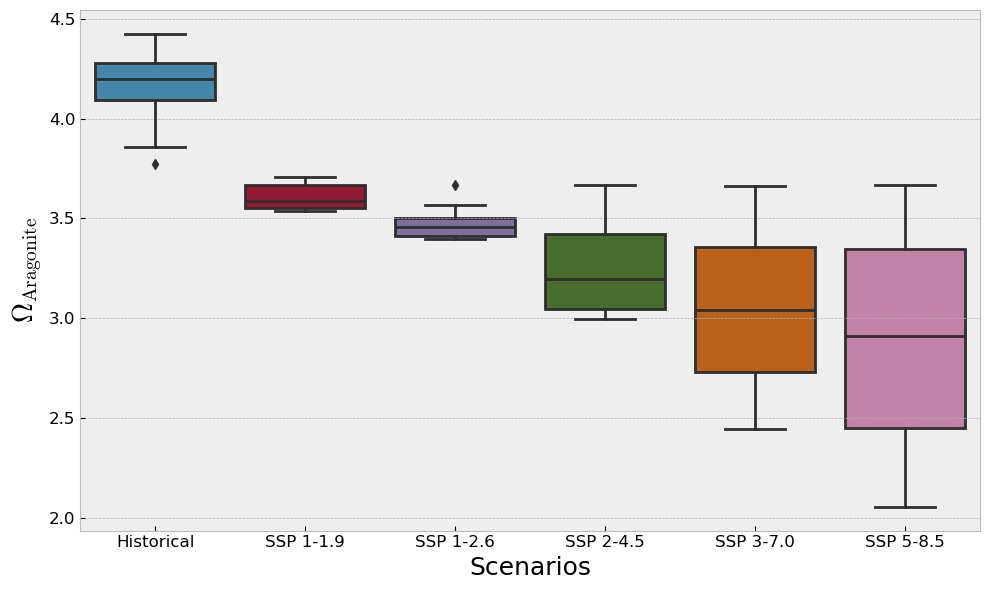

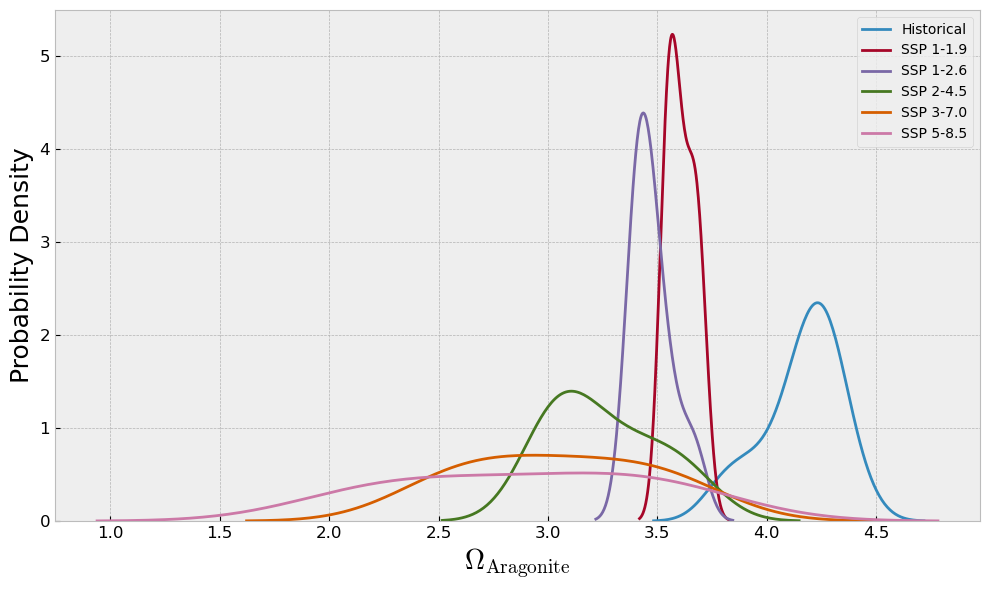

In [4]:
# Define the significance level
alpha = 0.05

# Generate dummy data with different sample sizes for the control group
data1 = ssp119['aragonite_med']
data2 = ssp126['aragonite_med']
data3 = ssp245['aragonite_med']
data4 = ssp370['aragonite_med']
data5 = ssp585['aragonite_med']
control = his['aragonite_med']

# Array of all groups for easy access
all_data = [control, data1, data2, data3, data4, data5]
labels = ['Historical', 'SSP 1-1.9', 'SSP 1-2.6', 'SSP 2-4.5', 'SSP 3-7.0', 'SSP 5-8.5']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df = pd.DataFrame({'Value': data_stacked, 'Group': groups})

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median pH.")

# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
    # Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')
    
    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")
    
    # Visualize Dunn's test results using a heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(dunn_pvalues, cmap='coolwarm_r', fmt=".3f", 
                     xticklabels=labels, yticklabels=labels)
    colorbar = ax.collections[0].colorbar
    colorbar.set_label('p-values', fontsize=18)
    plt.xticks(fontsize=12)  # Increased font size for x-axis labels
    plt.yticks(fontsize=12)  # Increased font size for y-axis labels
    plt.savefig('../figs/fig4d.png', dpi=450)  # Save the heatmap to a file
    
# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Scenarios', fontsize=18)
plt.ylabel(r"$\Omega_{\text{Aragonite}}$", fontsize=20)
plt.tight_layout()
plt.savefig('../figs/fig4b.png', dpi=450)  # Save the boxplot to a file

# Create and save a Density Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(all_data):
    sns.kdeplot(group, label=labels[i])
plt.legend()
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel(r"$\Omega_{\text{Aragonite}}$", fontsize=20)
plt.ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig4c.png', dpi=450)  # Save the density plot to a file

In [12]:
# Extracting argonite_med column for analysis
datasets = {
    'Historical': his['calcite_med'],
    'SSP119': ssp119['calcite_med'],
    'SSP126': ssp126['calcite_med'],
    'SSP245': ssp245['calcite_med'],
    'SSP370': ssp370['calcite_med'],
    'SSP585': ssp585['calcite_med']
}

# Perform skewness, kurtosis, Shapiro-Wilk test for normality, and ADF test for stationarity
for name, data in datasets.items():
    print(f"\nResults for {name}:")
    
    # Skewness and Kurtosis
    skew = stats.skew(data.dropna())  # dropna to handle missing values
    kurt = stats.kurtosis(data.dropna(), fisher=False)  # not adjusted by -3
    
    # Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p = stats.shapiro(data.dropna())
    
    # ADF test for stationarity
    adf_stat, adf_p, usedlag, nobs, critical_values, icbest = adfuller(data.dropna())
    
    print(f"  Skewness: {skew:.3f}")
    print(f"  Kurtosis: {kurt:.3f}")
    print(f"  Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")
    if shapiro_p > 0.05:
        print("  The distribution appears to be normal.")
    else:
        print("  The distribution does not appear to be normal.")
    
    print(f"  ADF Test: Statistic={adf_stat:.3f}, p-value={adf_p:.3f}, Critical Values={critical_values}")
    if adf_p < 0.05:
        print("  The time series is stationary.")
    else:
        print("  The time series is not stationary.")


Results for Historical:
  Skewness: -0.800
  Kurtosis: 2.890
  Shapiro-Wilk Test: Statistic=0.933, p-value=0.220
  The distribution appears to be normal.
  ADF Test: Statistic=4.654, p-value=1.000, Critical Values={'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
  The time series is not stationary.

Results for SSP119:
  Skewness: 0.305
  Kurtosis: 1.601
  Shapiro-Wilk Test: Statistic=0.903, p-value=0.269
  The distribution appears to be normal.
  ADF Test: Statistic=-0.950, p-value=0.771, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
  The time series is not stationary.

Results for SSP126:
  Skewness: 1.097
  Kurtosis: 3.127
  Shapiro-Wilk Test: Statistic=0.862, p-value=0.101
  The distribution appears to be normal.
  ADF Test: Statistic=-2.880, p-value=0.048, Critical Values={'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}
  The time series is stationary.

Results for SSP245:
  Skewness: 0.494
  Ku

Kruskal-Wallis test statistic: 47.961, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.
Dunn's test p-values (Bonferroni adjusted):
            Historical  SSP 1-1.9  SSP 1-2.6  SSP 2-4.5  SSP 3-7.0  SSP 5-8.5
Historical       1.000      0.353      0.004      0.000      0.000      0.000
SSP 1-1.9        0.353      1.000      1.000      0.737      0.163      0.096
SSP 1-2.6        0.004      1.000      1.000      1.000      1.000      1.000
SSP 2-4.5        0.000      0.737      1.000      1.000      1.000      1.000
SSP 3-7.0        0.000      0.163      1.000      1.000      1.000      1.000
SSP 5-8.5        0.000      0.096      1.000      1.000      1.000      1.000
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.


/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

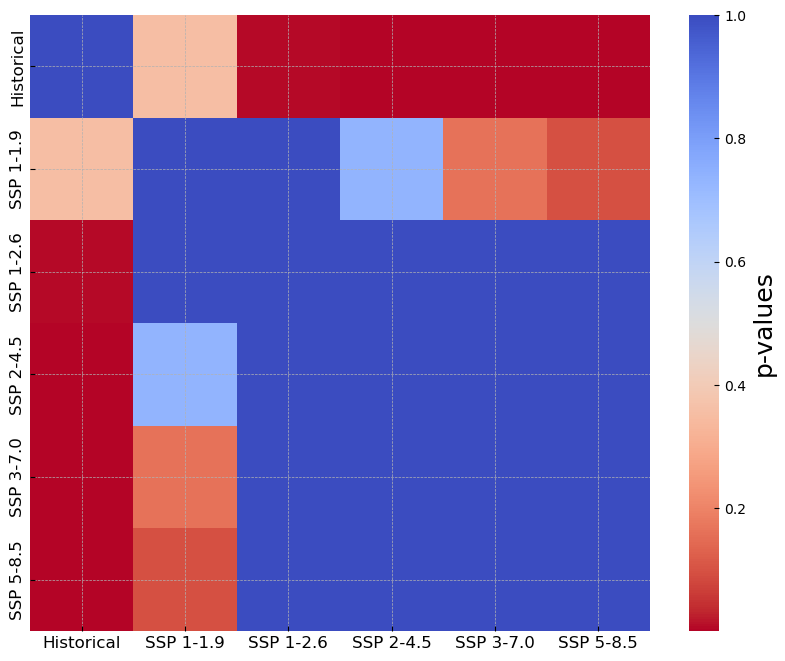

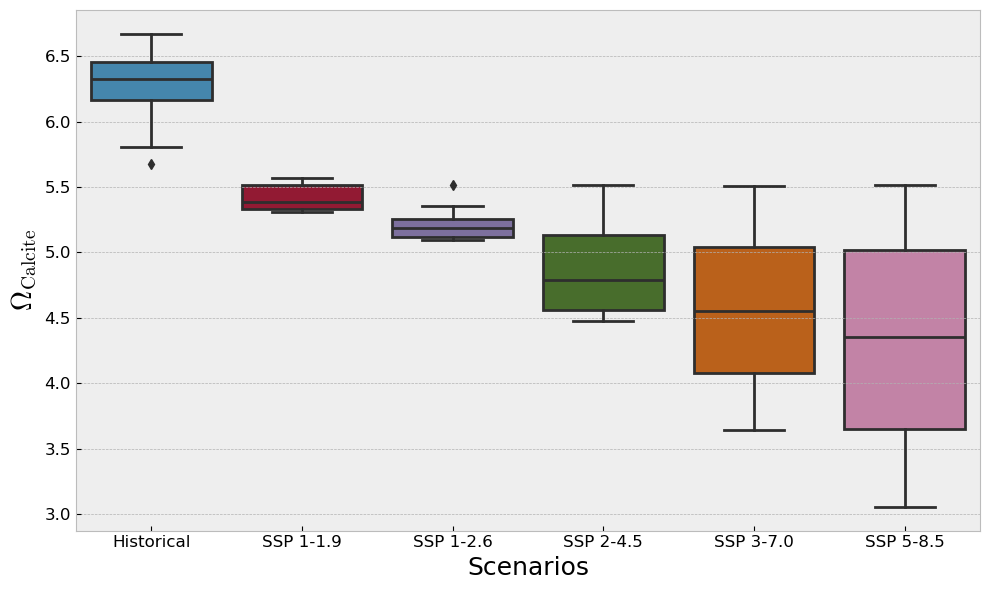

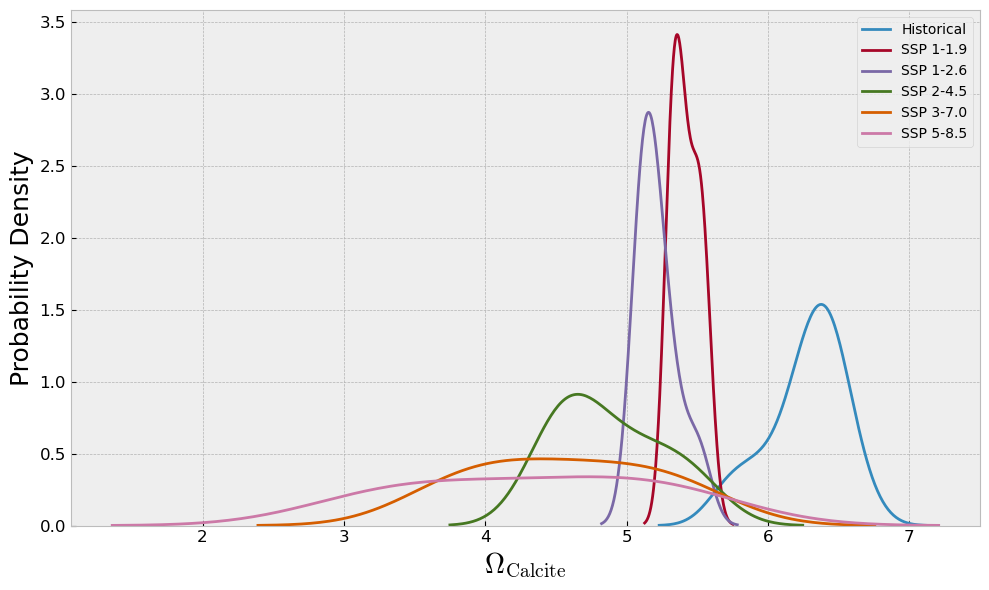

In [5]:
# Define the significance level
alpha = 0.05

# Generate dummy data with different sample sizes for the control group
data1 = ssp119['calcite_med']
data2 = ssp126['calcite_med']
data3 = ssp245['calcite_med']
data4 = ssp370['calcite_med']
data5 = ssp585['calcite_med']
control = his['calcite_med']

# Array of all groups for easy access
all_data = [control, data1, data2, data3, data4, data5]
labels = ['Historical', 'SSP 1-1.9', 'SSP 1-2.6', 'SSP 2-4.5', 'SSP 3-7.0', 'SSP 5-8.5']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df = pd.DataFrame({'Value': data_stacked, 'Group': groups})

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median pH.")

# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
    # Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')
    
    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")
    
    # Visualize Dunn's test results using a heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(dunn_pvalues, cmap='coolwarm_r', fmt=".3f", 
                     xticklabels=labels, yticklabels=labels)
    colorbar = ax.collections[0].colorbar
    colorbar.set_label('p-values', fontsize=18)
    plt.xticks(fontsize=12)  # Increased font size for x-axis labels
    plt.yticks(fontsize=12)  # Increased font size for y-axis labels
    plt.savefig('../figs/fig5d.png', dpi=450)  # Save the heatmap to a file
    
# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Scenarios', fontsize=18)
plt.ylabel(r"$\Omega_{\text{Calcite}}$", fontsize=20)
plt.tight_layout()
plt.savefig('../figs/fig5b.png', dpi=450)  # Save the boxplot to a file

# Create and save a Density Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(all_data):
    sns.kdeplot(group, label=labels[i])
plt.legend()
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel(r"$\Omega_{\text{Calcite}}$", fontsize=20)
plt.ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig5c.png', dpi=450)  # Save the density plot to a file

# Baru


Results for Historical:
  Skewness: -0.789
  Kurtosis: 2.871
  Shapiro-Wilk Test: Statistic=0.934, p-value=0.228
  ADF Test: Statistic=7.165, p-value=1.000, Critical Values={'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}

Results for SSP119:
  Skewness: 0.309
  Kurtosis: 1.609
  Shapiro-Wilk Test: Statistic=0.905, p-value=0.283
  ADF Test: Statistic=-0.928, p-value=0.779, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results for SSP126:
  Skewness: 1.082
  Kurtosis: 3.096
  Shapiro-Wilk Test: Statistic=0.864, p-value=0.107
  ADF Test: Statistic=-2.899, p-value=0.045, Critical Values={'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}

Results for SSP245:
  Skewness: 0.494
  Kurtosis: 1.845
  Shapiro-Wilk Test: Statistic=0.912, p-value=0.333
  ADF Test: Statistic=-2.145, p-value=0.227, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results for SSP370:
 

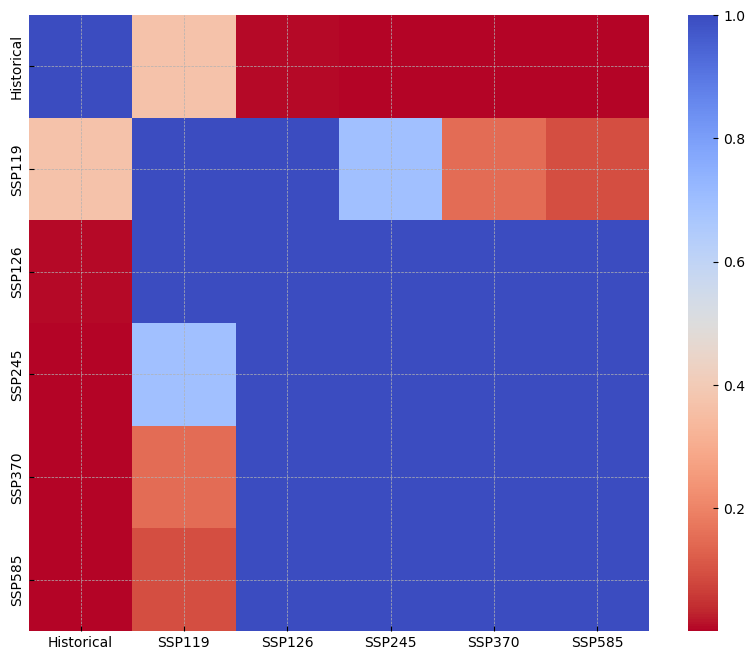

/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar


Results for Historical:
  Skewness: -0.800
  Kurtosis: 2.890
  Shapiro-Wilk Test: Statistic=0.933, p-value=0.220
  ADF Test: Statistic=4.654, p-value=1.000, Critical Values={'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}

Results for SSP119:
  Skewness: 0.305
  Kurtosis: 1.601
  Shapiro-Wilk Test: Statistic=0.903, p-value=0.269
  ADF Test: Statistic=-0.950, p-value=0.771, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results for SSP126:
  Skewness: 1.097
  Kurtosis: 3.127
  Shapiro-Wilk Test: Statistic=0.862, p-value=0.101
  ADF Test: Statistic=-2.880, p-value=0.048, Critical Values={'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}

Results for SSP245:
  Skewness: 0.494
  Kurtosis: 1.848
  Shapiro-Wilk Test: Statistic=0.913, p-value=0.341
  ADF Test: Statistic=-2.703, p-value=0.074, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results for SSP370:
 

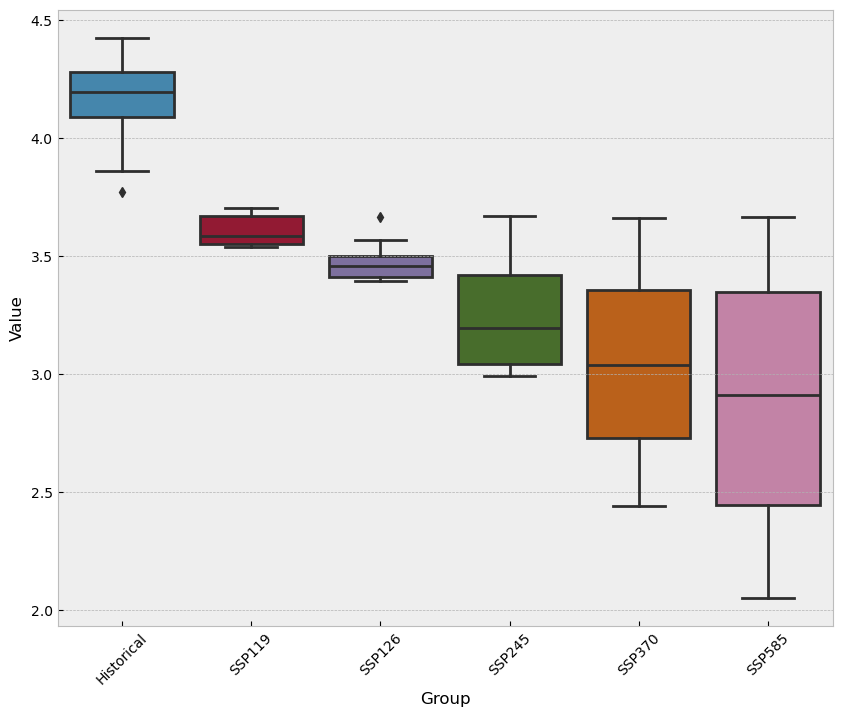

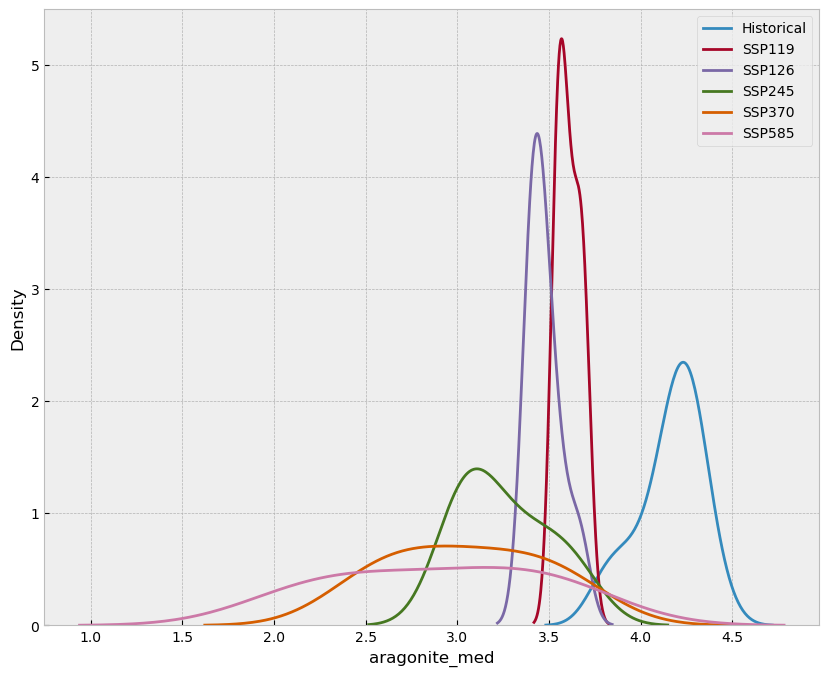

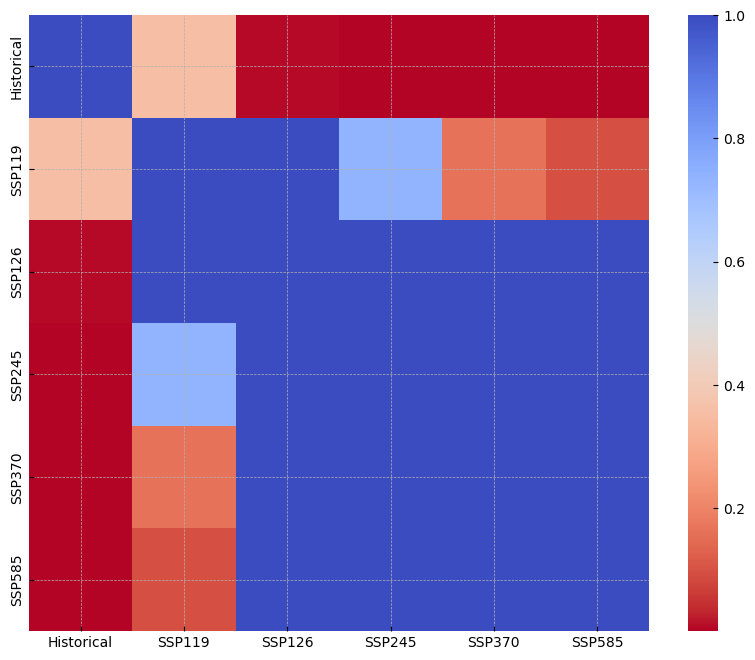

/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar


Results for Historical:
  Skewness: -0.944
  Kurtosis: 3.156
  Shapiro-Wilk Test: Statistic=0.917, p-value=0.114
  ADF Test: Statistic=1.496, p-value=0.998, Critical Values={'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}

Results for SSP119:
  Skewness: 0.275
  Kurtosis: 1.588
  Shapiro-Wilk Test: Statistic=0.906, p-value=0.290
  ADF Test: Statistic=-3.236, p-value=0.018, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results for SSP126:
  Skewness: 1.184
  Kurtosis: 3.296
  Shapiro-Wilk Test: Statistic=0.846, p-value=0.067
  ADF Test: Statistic=-2.247, p-value=0.190, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results for SSP245:
  Skewness: 0.443
  Kurtosis: 1.817
  Shapiro-Wilk Test: Statistic=0.925, p-value=0.433
  ADF Test: Statistic=-5.269, p-value=0.000, Critical Values={'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results for SSP370:
  

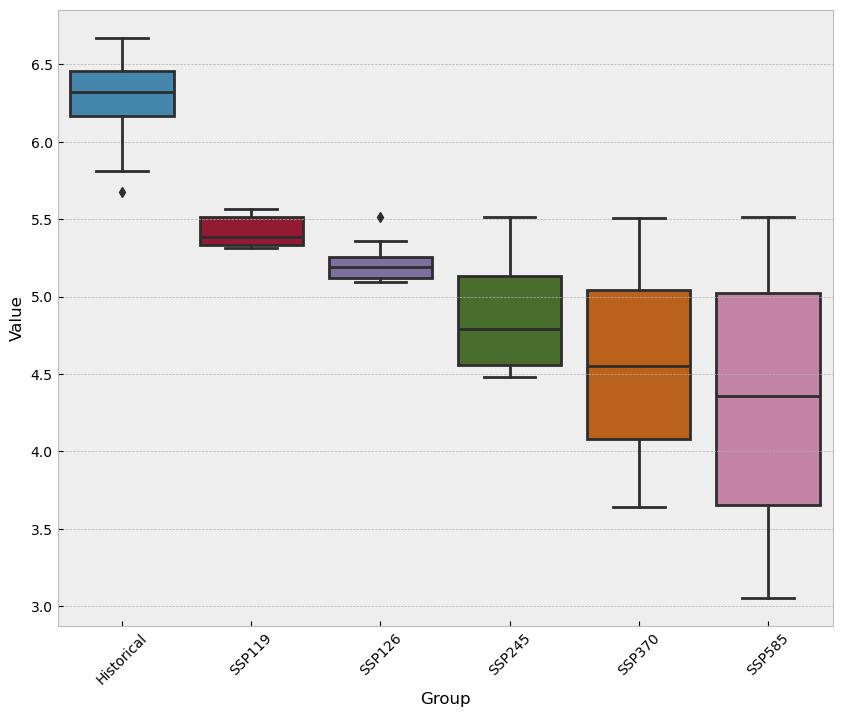

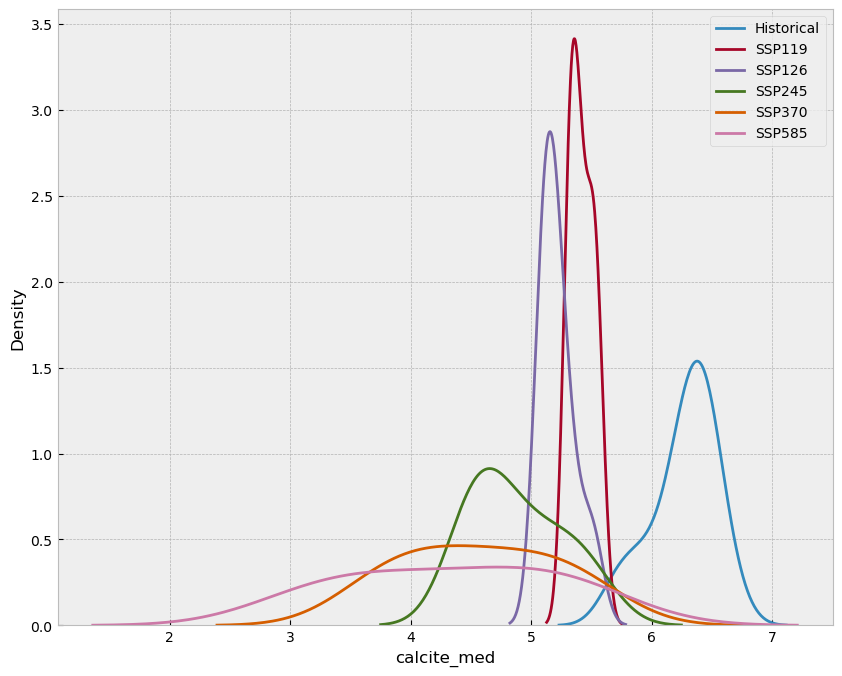

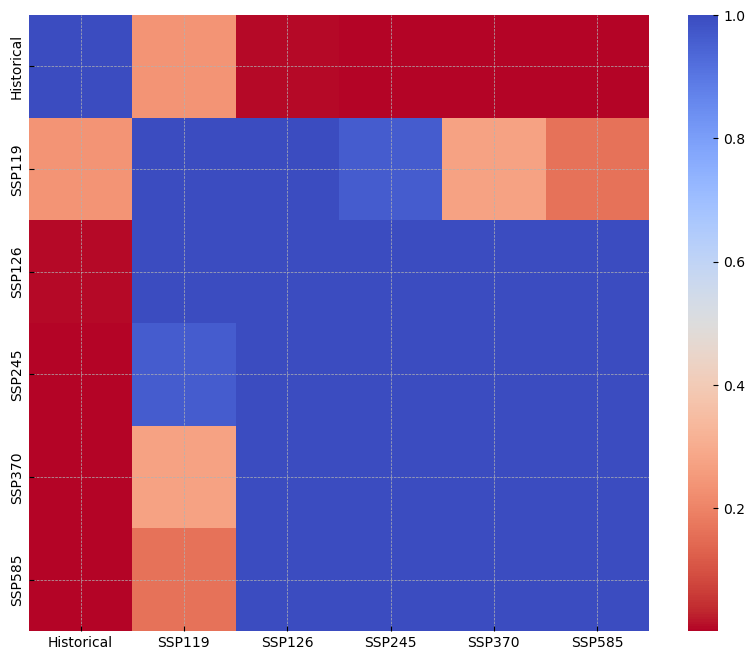

/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

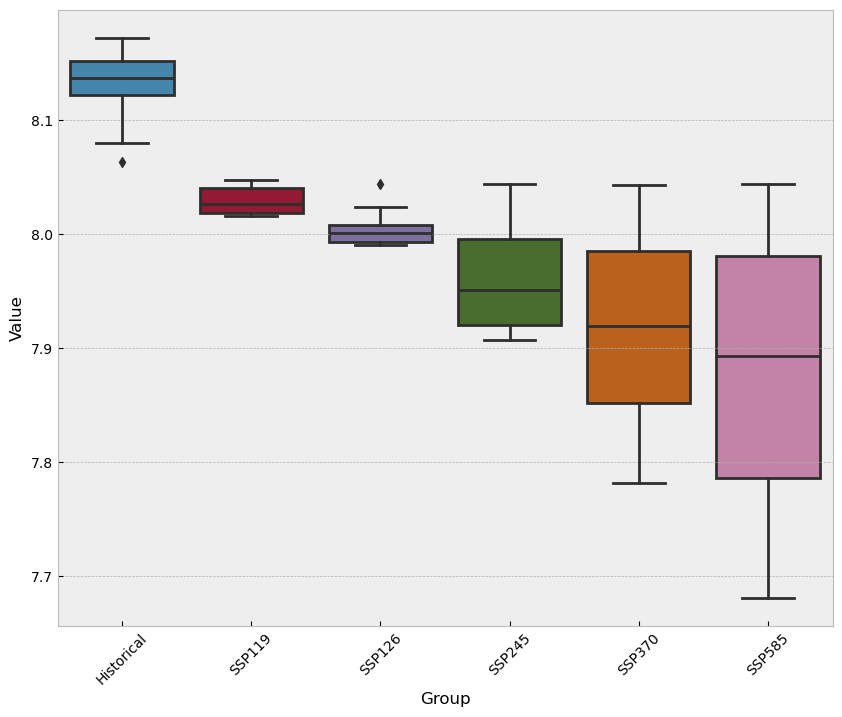

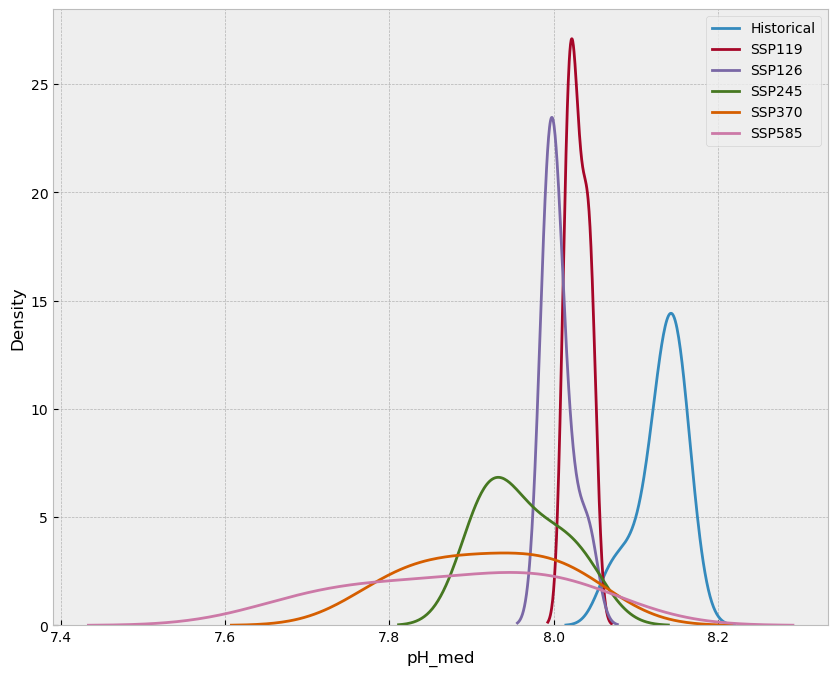

In [14]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
import scikit_posthocs as sp

# Set visual style for all matplotlib plots
plt.style.use("bmh")

# Load data from CSV files
def load_data(file_path, column_name):
    return pd.read_csv(file_path)[column_name]

# File paths for the datasets
file_paths = {
    'Historical': '../data/processed/temporal/historical.csv',
    'SSP119': '../data/processed/temporal/ssp119.csv',
    'SSP126': '../data/processed/temporal/ssp126.csv',
    'SSP245': '../data/processed/temporal/ssp245.csv',
    'SSP370': '../data/processed/temporal/ssp370.csv',
    'SSP585': '../data/processed/temporal/ssp585.csv'
}

# Load specified column for each scenario
def load_datasets(file_paths, column_name):
    return {scenario: load_data(path, column_name) for scenario, path in file_paths.items()}

# Statistical analysis function
def analyze_data(data):
    data = data.dropna()  # Ensure no NA values interfere with calculations
    skew = stats.skew(data)
    kurt = stats.kurtosis(data, fisher=False)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    adf_stat, adf_p, usedlag, nobs, critical_values, icbest = adfuller(data)
    return skew, kurt, shapiro_stat, shapiro_p, adf_stat, adf_p, critical_values

# Display statistical results
def display_results(scenario, results):
    print(f"\nResults for {scenario}:")
    skew, kurt, shapiro_stat, shapiro_p, adf_stat, adf_p, critical_values = results
    print(f"  Skewness: {skew:.3f}")
    print(f"  Kurtosis: {kurt:.3f}")
    print(f"  Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")
    print(f"  ADF Test: Statistic={adf_stat:.3f}, p-value={adf_p:.3f}, Critical Values={critical_values}")

# Function to prepare data for statistical testing
def prepare_data_for_testing(file_paths, column_name):
    data = [load_data(path, column_name) for path in file_paths.values()]
    labels = list(file_paths.keys())
    data_stacked = np.concatenate(data)
    groups = np.concatenate([[label] * len(d) for d, label in zip(data, labels)])
    return pd.DataFrame({'Value': data_stacked, 'Group': groups}), labels

# Function to perform Kruskal-Wallis and Dunn's tests
def perform_statistical_tests(df, labels, alpha=0.05):
    # Kruskal-Wallis test
    kw_stat, kw_pvalue = stats.kruskal(*[df[df['Group'] == label]['Value'] for label in labels])
    print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')

    if kw_pvalue < alpha:
        print("Significant differences found among the groups.")
        # Dunn's post-hoc test with Bonferroni adjustment
        dunn_pvalues = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')
        print(dunn_pvalues.round(3))
        # Plot heatmap of Dunn's test results
        plt.figure(figsize=(10, 8))
        sns.heatmap(dunn_pvalues, cmap='coolwarm_r', xticklabels=labels, yticklabels=labels)
        plt.show()

# Function to plot boxplots
def plot_results(df, labels, filename):
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Group', y='Value', data=df)
    plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45)
    plt.savefig(filename)

# Prepare and plot data
def prepare_and_plot_data(file_paths, column_name, file_prefix):
    data = load_datasets(file_paths, column_name)
    for scenario, dataset in data.items():
        results = analyze_data(dataset)
        display_results(scenario, results)
    df, labels = prepare_data_for_testing(file_paths, column_name)
    perform_statistical_tests(df, labels)
    plot_results(df, labels, f'../figs/{file_prefix}_boxplot.png')
    plot_density(data, labels, f'../figs/{file_prefix}_density.png')

# Plot density for each scenario
def plot_density(data, labels, filename):
    plt.figure(figsize=(10, 8))
    for label, dataset in data.items():
        sns.kdeplot(dataset.dropna(), label=label)
    plt.legend()
    plt.savefig(filename)

if __name__ == "__main__":
    # Analyze and plot for 'aragonite_med'
    prepare_and_plot_data(file_paths, 'aragonite_med', 'aragonite_med')

    # Analyze and plot for 'calcite_med'
    prepare_and_plot_data(file_paths, 'calcite_med', 'calcite_med')

    # Analyze and plot for 'pH_med'
    prepare_and_plot_data(file_paths, 'pH_med', 'pH_med')
